In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

## b) Load the training and test set.

In [2]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

In [4]:
train_labels.shape

(540,)

In [6]:
train_data.shape

(540, 2500)

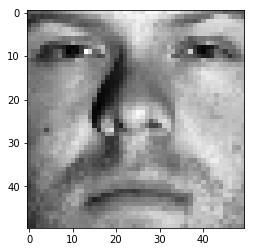

In [8]:
plt.imshow(train_data[1, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


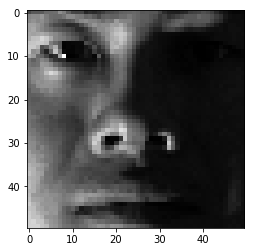

In [10]:
test_labels, test_data = [],[]
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print (test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## c) Average Face. 

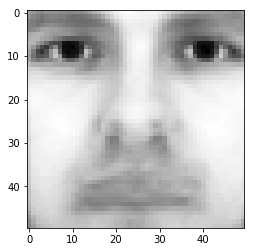

In [12]:
avg_face = train_data[0]
for i in range(0,2500):
    avg_face[i] = np.mean(train_data[:,i])
plt.imshow(avg_face.reshape(50,50), cmap=cm.Greys_r)

## d)Mean Subtraction. 

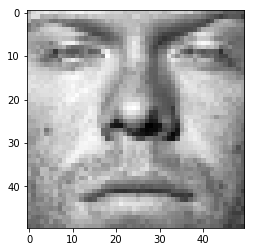

In [15]:
train_sub = train_data.copy()
test_sub = test_data.copy()

for i in range(0,train_sub.shape[0]):
    train_sub[i] -= avg_face

plt.imshow(train_sub[10,:].reshape(50,50), cmap = cm.Greys_r)

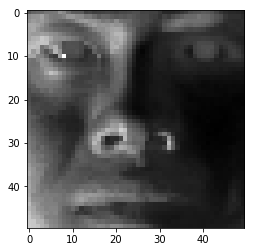

In [16]:
for i in range(0,test_sub.shape[0]):
    test_sub[i] -= avg_face

plt.imshow(test_sub[10,:].reshape(50,50), cmap = cm.Greys_r)

## e) Eigenface.

In [21]:
u,s,v = np.linalg.svd(train_data)
v = np.array(v, dtype=float)
v.shape

(2500, 2500)

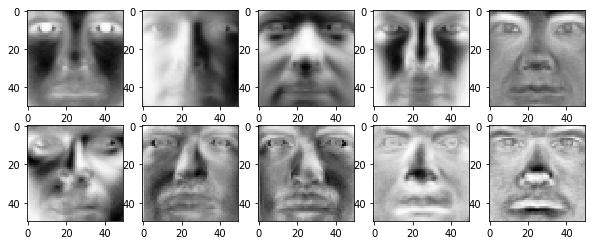

In [65]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(v[i,:].reshape(50,50), cmap = cm.Greys_r)

## f) Low-rank Approximation. 

In [33]:
low_rank_err = []
for r in range(0,200):
    Xr = np.zeros((len(u), len(v)))
    for i in range(r):
        Xr += s[i] *np.outer(u.T[i], v[i])
    low_rank_err.append(np.linalg.norm(Xr-train_data))

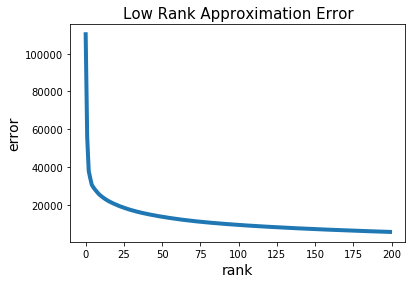

In [59]:
plt.figure(figsize=(6,4))
plt.plot(range(0,200),low_rank_err, linewidth=4)
plt.title("Low Rank Approximation Error", fontsize=15)
plt.xlabel('rank', fontsize=14)
plt.ylabel('error', fontsize=14)

## g) Eigenface Feature. 

In [49]:
def eigenface_feature(r_dim):
    v_r_t = (v[:r_dim,:]).T #face space
    F = np.dot(train_data, v_r_t)
    F_test = np.dot(test_data, v_r_t)
    return (F,F_test)

## h) Face Recognition

In [48]:
from sklearn.linear_model import LogisticRegression

In [62]:
logReg = LogisticRegression()
accuracy = []

for r_dim in range(1,201):
    F, F_test = eigenface_feature(r_dim)
    logReg.fit(F,train_labels)
    accuracy.append(logReg.score(F_test, test_labels))


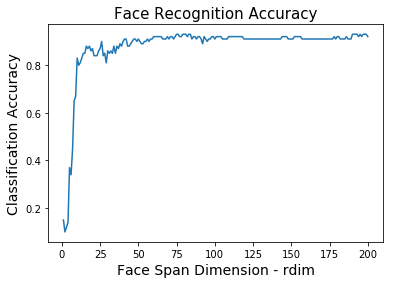

In [63]:
plt.plot(range(1,201),accuracy)
plt.title("Face Recognition Accuracy", fontsize=15)
plt.xlabel("Face Span Dimension - rdim", fontsize=14)
plt.ylabel("Classification Accuracy", fontsize=14)